In [1]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

%matplotlib widget
import numpy as np
from slam.utils.polytopes.coverage_plot import plot_coverage_set
from slam.basis import MixedOrderBasisCircuitTemplate
from slam.utils.gates.custom_gates import ConversionGainGate

In [2]:
# #coverage of an arbitrary gate 
# # will load coverage polytope from file in template constructor or create it if it doesn't exist
# base_gate = ConversionGainGate(0,0, np.pi/8, 3*np.pi/8, 1/2)
# template = MixedOrderBasisCircuitTemplate(base_gates=[base_gate], chatty_build=0, bare_cost=True)
# plot_coverage_set(template.coverage[:], save=0, filename=f"coverage_set_custom") 

In [3]:
iswap = np.pi/2, 0, 1, "iSwap", 3
sqiswap = np.pi/2, 0, 1/2, "sqiSwap", 3
cnot = np.pi/4, np.pi/4, 1, "CNOT", 3
sqcnot = np.pi/4, np.pi/4, 1/2, "sqCNOT", 6
b = 3*np.pi/8, np.pi/8, 1, "B", 2
sqb = 3*np.pi/8, np.pi/8, 1/2,  "sqB", 4
gate_list = [iswap, sqiswap, cnot, sqcnot, b, sqb]

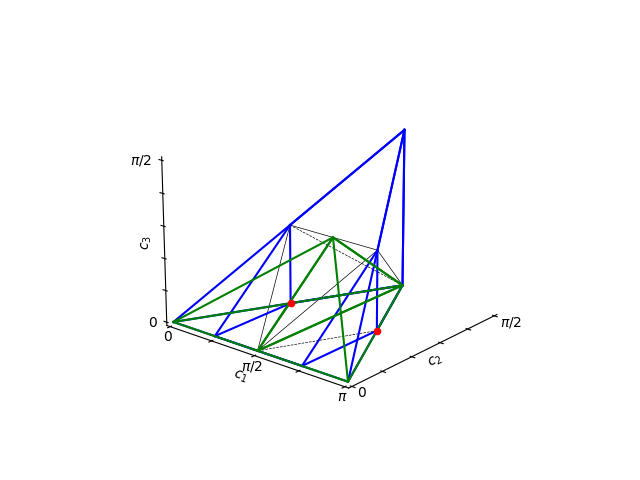

In [10]:
use_smush = 0
for gate_prop in gate_list[1:2]:
    base_gate = ConversionGainGate(0,0, *gate_prop[:3])
    template = MixedOrderBasisCircuitTemplate(base_gates=[base_gate], chatty_build=0, bare_cost=True, use_smush_polytope=use_smush)
    fname = f"coverage_set_{gate_prop[3]}"
    if use_smush:
        fname += "_smush"

    poly_list = template.coverage
    fig = plot_coverage_set(poly_list[:], save=1, filename=fname) 

In [18]:
# take 3d axis of fig, and turn into gif with small rotations, stereoscopic view
import matplotlib.pyplot as pltFigure 1

from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

for i in range(len(fig.axes)):
    ax = fig.axes[i]
    ax.view_init(30, 45)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.set_aspect("equal")

    def update(i):
        ax.view_init(30, 45 + i)
        return fig,

    anim = FuncAnimation(fig, update, frames=np.arange(0, 15, 1), interval=20)
    anim.save(f"{fname}_3d.gif", dpi=80, writer="imagemagick")

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: convert -size 512x384 -depth 8 -delay 2.0 -loop 0 rgba:- -layers OptimizePlus coverage_set_sqiSwap_3d.gif
